In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from scipy.signal import lfilter

import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
from preprocessing import import_preprocessed_data, add_empties_column, calculate_empties

In [3]:
dfs_c_0, dfs_c_1, dfs_c_2, dfs_c_0_grouped, dfs_c_1_grouped, dfs_c_2_grouped = import_preprocessed_data() # import all data

In [4]:
dfs_c_0_grouped[0] #first container data

,time_stamp,Height,Temperature,Tilt,lfilter,mov_avg,min_avg,device_id,inter_pol
0,2020-05-09,90.666667,13.166667,1.611111,14.698148,NaN,NaN,70B3D500700016E5,89.543860
1,2020-05-10,88.421053,20.263158,1.315789,41.745614,89.543860,86.000000,70B3D500700016E5,89.543860
2,2020-05-11,106.000000,7.000000,1.350000,72.068333,97.210526,83.800000,70B3D500700016E5,97.210526
3,2020-05-12,135.238095,10.714286,1.523810,102.547619,120.619048,84.095238,70B3D500700016E5,120.619048
4,2020-05-13,132.095238,11.904762,1.619048,118.809524,133.666667,127.238095,70B3D500700016E5,133.666667
...,...,...,...,...,...,...,...,...,...
360,2021-05-04,105.888889,9.500000,1.055556,111.131481,107.069444,104.888889,70B3D500700016E5,107.069444
361,2021-05-05,101.684211,9.894737,1.052632,107.850877,103.786550,98.947368,70B3D500700016E5,103.786550
362,2021-05-06,95.764706,7.941176,1.235294,103.456863,98.724458,94.000000,70B3D500700016E5,98.724458
363,2021-05-07,111.058824,8.294118,1.058824,101.276471,103.411765,94.000000,70B3D500700016E5,103.411765


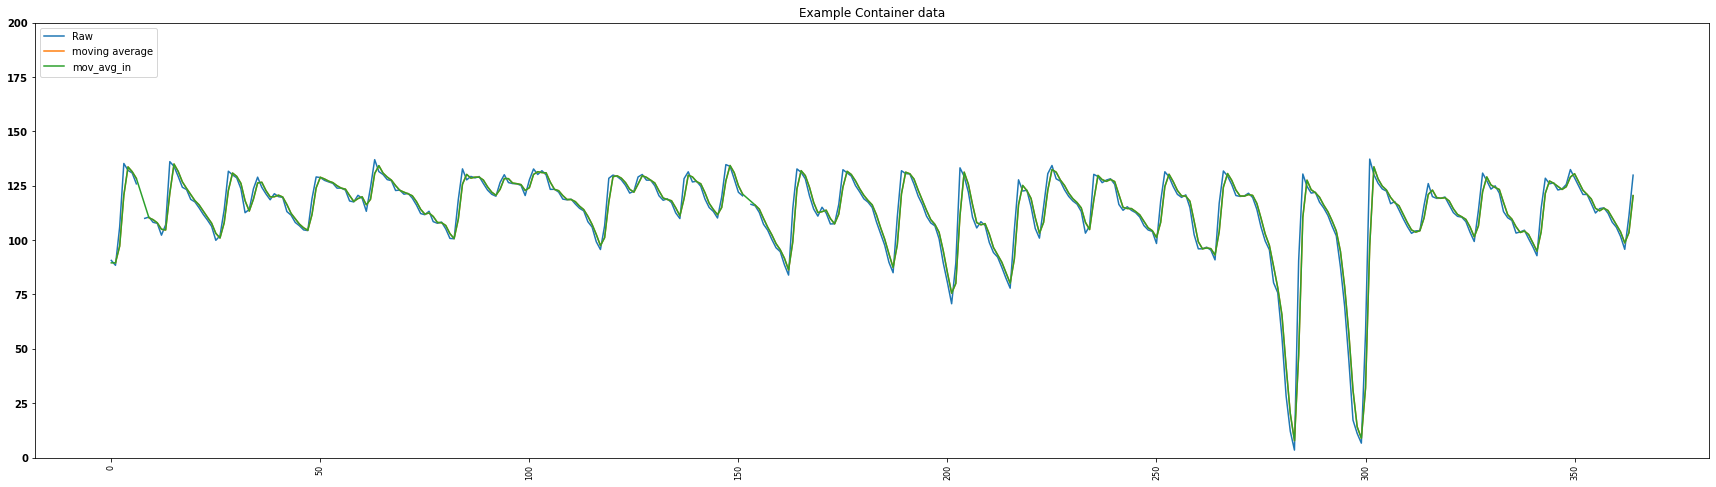

In [10]:
# plot container data
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title('Example Container data')

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(dfs_c_0_grouped[0]['Height'])
plt.plot(dfs_c_0_grouped[0]['mov_avg'])
plt.plot(dfs_c_0_grouped[0]['inter_pol'])
plt.legend(['Raw', 'moving average', 'mov_avg_in'], loc='upper left')
plt.show()

In [6]:
test = calculate_empties(dfs_c_0_grouped[0], 1.05) # calculate empties of the container
test

[3,
 14,
 28,
 35,
 49,
 63,
 84,
 120,
 138,
 147,
 164,
 175,
 189,
 204,
 218,
 224,
 236,
 252,
 266,
 286,
 302,
 315,
 328,
 343,
 364]

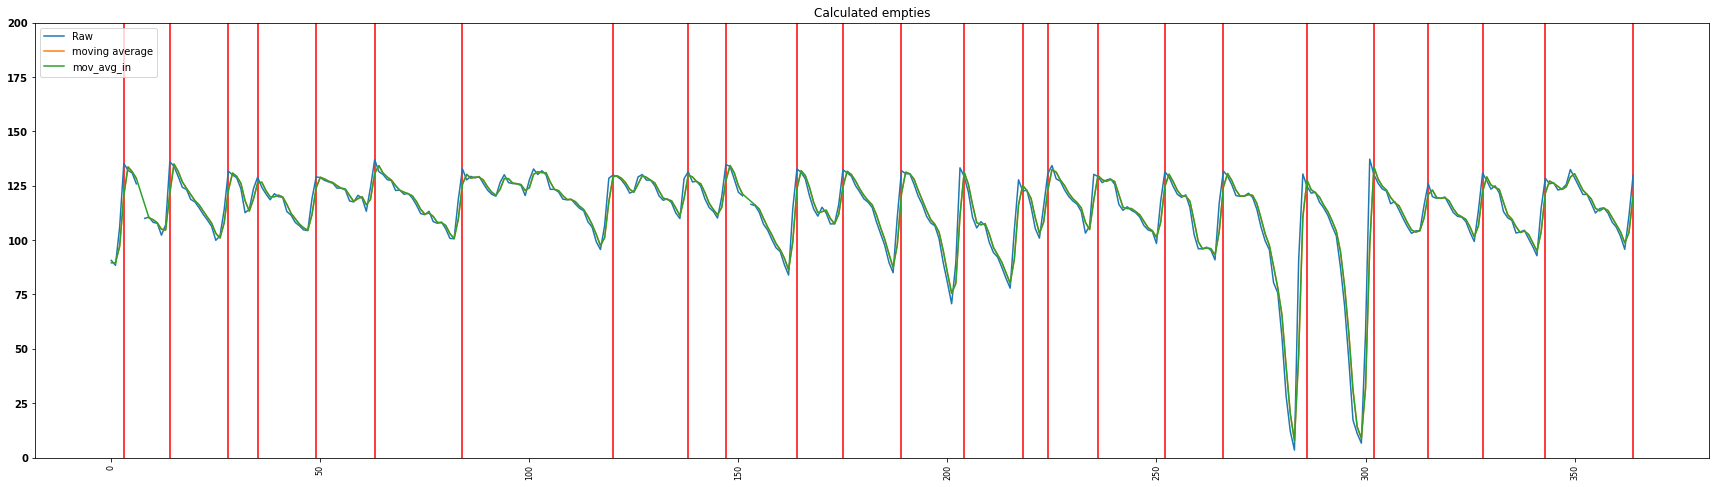

In [7]:
# plot container data and the calculated empties
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title('Calculated empties')

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(dfs_c_0_grouped[0]['Height'])
plt.plot(dfs_c_0_grouped[0]['mov_avg'])
plt.plot(dfs_c_0_grouped[0]['inter_pol'])
plt.legend(['Raw', 'moving average', 'mov_avg_in'], loc='upper left')

for i in test: 
    plt.vlines(i, color="red", ymin=0, ymax=200)
plt.show()

In [8]:
df_final = add_empties_column(dfs_c_0_grouped[0], test) # add calculated empties to DataFrame

C:\BDA\Repo1707\bda-analytics-challenge-template\src\preprocessing.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['empties'][i] = 1


In [9]:
df_final

,time_stamp,Height,Temperature,Tilt,lfilter,mov_avg,min_avg,device_id,inter_pol,empties
0,2020-05-09,90.666667,13.166667,1.611111,14.698148,NaN,NaN,70B3D500700016E5,89.543860,0
1,2020-05-10,88.421053,20.263158,1.315789,41.745614,89.543860,86.000000,70B3D500700016E5,89.543860,0
2,2020-05-11,106.000000,7.000000,1.350000,72.068333,97.210526,83.800000,70B3D500700016E5,97.210526,0
3,2020-05-12,135.238095,10.714286,1.523810,102.547619,120.619048,84.095238,70B3D500700016E5,120.619048,1
4,2020-05-13,132.095238,11.904762,1.619048,118.809524,133.666667,127.238095,70B3D500700016E5,133.666667,0
...,...,...,...,...,...,...,...,...,...,...
360,2021-05-04,105.888889,9.500000,1.055556,111.131481,107.069444,104.888889,70B3D500700016E5,107.069444,0
361,2021-05-05,101.684211,9.894737,1.052632,107.850877,103.786550,98.947368,70B3D500700016E5,103.786550,0
362,2021-05-06,95.764706,7.941176,1.235294,103.456863,98.724458,94.000000,70B3D500700016E5,98.724458,0
363,2021-05-07,111.058824,8.294118,1.058824,101.276471,103.411765,94.000000,70B3D500700016E5,103.411765,0
